In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as p


In [2]:
d=pd.read_csv("data.csv")

In [3]:
d.drop("customerID",axis=1,inplace=True)

In [4]:
pd.to_numeric(d.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [5]:
d=d[d.TotalCharges!=' ']
x=d[d.Churn=='No'].tenure
y=d[d.Churn=='Yes'].tenure

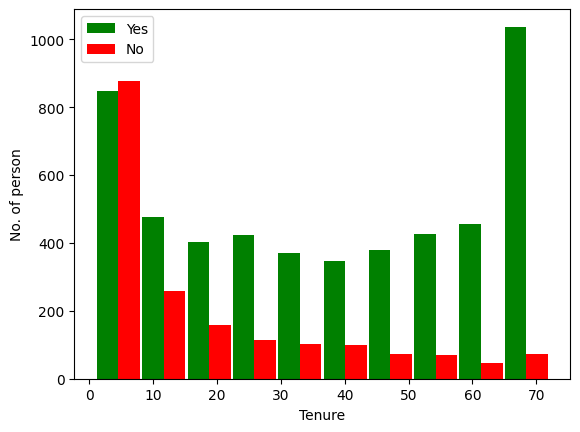

In [6]:
p.xlabel("Tenure")
p.ylabel("No. of person")
p.hist([x,y], rwidth=0.95,color=['green','red'],label=['Yes','No'])
p.legend()

In [7]:
d.replace('No internet service','No',inplace=True)
d.replace('No phone service','No',inplace=True)

In [8]:
d.replace(["DSL","Fiber optic"],'Yes',inplace=True)

In [9]:
change=['Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for i in change:
    d[i].replace({'Yes':1,'No':0},inplace=True)

In [10]:
new=pd.get_dummies(data=d,columns=['Contract'])

In [11]:
new.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year'],
      dtype='object')

In [12]:
ty=['Contract_One year','Contract_Month-to-month','Contract_Two year']

In [13]:
for j in ty:
    new[j].replace({True:1,False:0},inplace=True)

In [14]:
ko=['TotalCharges','MonthlyCharges','tenure']
from sklearn.preprocessing import MinMaxScaler
ty=MinMaxScaler()

new[ko]=ty.fit_transform(new[ko])


In [15]:
new.replace({'Female':1,'Male':0},inplace=True)

In [16]:
new

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,1,0,0.000000,0,0,1,0,1,...,0,0,1,Electronic check,0.115423,0.001275,0,1,0,0
1,0,0,0,0,0.464789,1,0,1,1,0,...,0,0,0,Mailed check,0.385075,0.215867,0,0,1,0
2,0,0,0,0,0.014085,1,0,1,1,1,...,0,0,1,Mailed check,0.354229,0.010310,1,1,0,0
3,0,0,0,0,0.619718,0,0,1,1,0,...,0,0,0,Bank transfer (automatic),0.239303,0.210241,0,0,1,0
4,1,0,0,0,0.014085,1,0,1,0,0,...,0,0,1,Electronic check,0.521891,0.015330,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,1,0,...,1,1,1,Mailed check,0.662189,0.227521,0,0,1,0
7039,1,0,1,1,1.000000,1,1,1,0,1,...,1,1,1,Credit card (automatic),0.845274,0.847461,0,0,1,0
7040,1,0,1,1,0.140845,0,0,1,1,0,...,0,0,1,Electronic check,0.112935,0.037809,0,1,0,0
7041,0,1,1,0,0.042254,1,1,1,0,0,...,0,0,1,Mailed check,0.558706,0.033210,1,1,0,0


In [17]:
new.drop('PaymentMethod',axis=1,inplace=True)
from sklearn.model_selection import train_test_split

In [18]:
X,x,Y,y=train_test_split(new.drop('Churn',axis=1),new['Churn'],test_size=0.2)

In [19]:
import tensorflow as tf

model without any dropout layer

In [20]:

mod=tf.keras.Sequential([tf.keras.layers.Dense(20,input_shape=(20, ),activation='relu'),tf.keras.layers.Dense(1,activation='sigmoid')])
mod.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
mod.fit(X,Y,epochs=100)



Epoch 1/100


176/176 [==============================] - 1s 1ms/step - loss: 0.6059 - accuracy: 0.6599
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4871 - accuracy: 0.7552
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4495 - accuracy: 0.7868
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4393 - accuracy: 0.7927
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4348 - accuracy: 0.7952
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4315 - accuracy: 0.7964
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4291 - accuracy: 0.7957
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4286 - accuracy: 0.7957
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4266 - accuracy: 0.8005
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4259 - ac

In [21]:
res=mod.predict(x)

44/44 [==============================] - 0s 681us/step


In [22]:
count=0
l=0
for i in y:
    temp=0
    if(res[l]>=0.5):
        temp=1
    if(temp==i):
        count+=1
    l+=1    
print(count)        

1123


accuracy in detection is almost

In [23]:
print(((1127)/1407)*100)

80.09950248756219


almost the same we predicted 

In [31]:
 mod.evaluate(x,y)

44/44 [==============================] - 0s 740us/step - loss: 0.4167 - accuracy: 0.7982


[0.4166651964187622, 0.7981520891189575]

now we will train a another model with same activation function and same number of layer but with some dropout layers for better performance

In [32]:
model=tf.keras.Sequential([tf.keras.layers.Dense(20,input_shape=(20, ),activation='relu'),tf.keras.layers.Dropout(0.5),tf.keras.layers.Dense(1,activation='sigmoid')])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X,Y,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 902us/step - loss: 0.6697 - accuracy: 0.6185
Epoch 2/100
176/176 [==============================] - 0s 906us/step - loss: 0.5386 - accuracy: 0.7255
Epoch 3/100
176/176 [==============================] - 0s 903us/step - loss: 0.5004 - accuracy: 0.7470
Epoch 4/100
176/176 [==============================] - 0s 886us/step - loss: 0.4769 - accuracy: 0.7627
Epoch 5/100
176/176 [==============================] - 0s 905us/step - loss: 0.4718 - accuracy: 0.7662
Epoch 6/100
176/176 [==============================] - 0s 889us/step - loss: 0.4678 - accuracy: 0.7682
Epoch 7/100
176/176 [==============================] - 0s 888us/step - loss: 0.4611 - accuracy: 0.7708
Epoch 8/100
176/176 [==============================] - 0s 874us/step - loss: 0.4542 - accuracy: 0.7714
Epoch 9/100
176/176 [==============================] - 0s 880us/step - loss: 0.4544 - accuracy: 0.7758
Epoch 10/100
176/176 [==============================] - 0s 885us/step - l

In [33]:
model.evaluate(x,y)

44/44 [==============================] - 0s 983us/step - loss: 0.4130 - accuracy: 0.8003


[0.413017600774765, 0.8002842664718628]

here what we discoverd is accuracy on our training dataset decreased but where on testing dataset it increased 

In [38]:
from sklearn.metrics import classification_report

for model with dropout layers classification report is 

In [39]:
y_pred=model.predict(x)
y_pred=np.round(y_pred)
print(classification_report(y,y_pred))

44/44 [==============================] - 0s 677us/step
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1055
           1       0.63      0.49      0.55       352

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407



for model without dropout layer 

In [40]:
y_P=mod.predict(x)
y_P=np.round(y_P)
print(classification_report(y,y_P))

44/44 [==============================] - 0s 623us/step
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1055
           1       0.61      0.53      0.57       352

    accuracy                           0.80      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [41]:
print()

thankyou, see you soon
(08-01-2024)